DFT and FFT using numpy and fft

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(<Axes: title={'center': 'IFFT Image invere'}>,
 Text(0.5, 1.0, 'IFFT Image invere'))

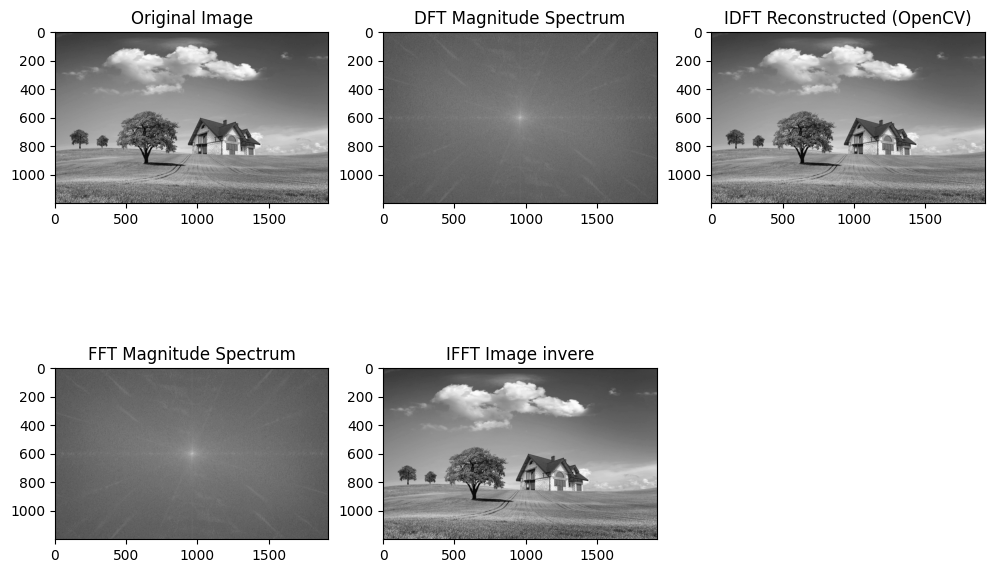

In [20]:
image =  cv2.imread("nature3.png",0)


dft = cv2.dft(np.float32(image) , flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magntude = cv2.magnitude(dft_shift[:,:, 0] , dft_shift[:,:,1])
magntude_spectrum = 20*np.log(magntude + 1)
idft = cv2.idft(dft , flags = cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)


#dft using   numply  fft
fft_image = np.fft.fft2(image)
fft_shift = np.fft.fftshift(fft_image)
fft_magnitude = 20*np.log(np.abs(fft_shift))

ifft_image = np.fft.ifft2(fft_image).real

plt.figure(figsize=(12,8))

plt.subplot(231) , plt.imshow(image , cmap='gray') , plt.title("Original Image")
plt.subplot(232) , plt.imshow(magntude_spectrum , cmap='gray') , plt.title("DFT Magnitude Spectrum")
plt.subplot(233) , plt.imshow(idft, cmap='gray'), plt.title('IDFT Reconstructed (OpenCV)')


plt.subplot(234) , plt.imshow(fft_magnitude , cmap='gray') , plt.title("FFT Magnitude Spectrum")
plt.subplot(235) , plt.imshow(ifft_image , cmap='gray') , plt.title("IFFT Image invere")

DCT

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread ("nature3.png",0)
dct = cv2.dct(image.astype(np.float32))
idct = cv2.idct(dct)

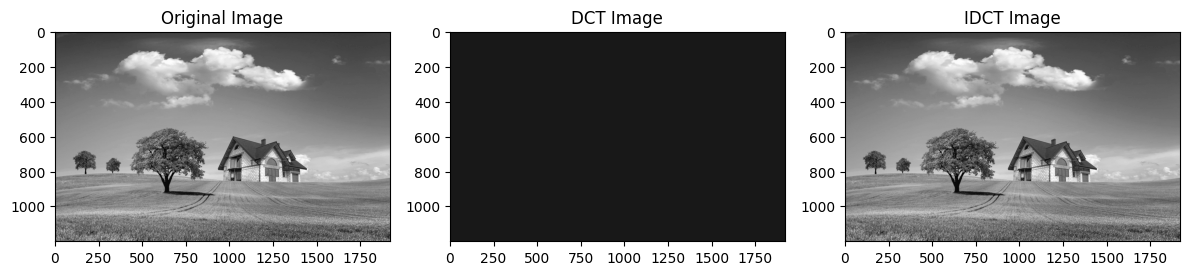

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)  # 1 row, 3 columns, 1st
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1,3,2)  # 1 row, 3 columns, 2nd
plt.imshow(dct, cmap="gray")
plt.title("DCT Image")

plt.subplot(1,3,3)  # 1 row, 3 columns, 3rd
plt.imshow(idct, cmap="gray")
plt.title("IDCT Image")

plt.tight_layout()
plt.show()


Using  DWT

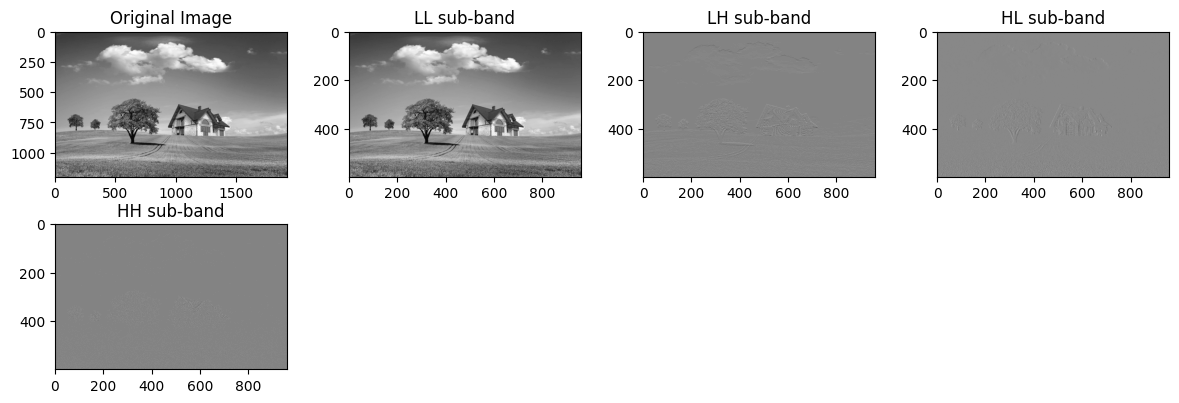

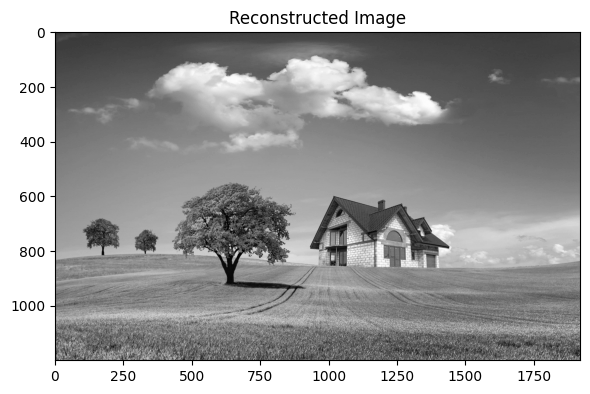

In [20]:
import cv2 
import numpy as np
import pywt
import matplotlib.pyplot as plt

image = cv2.imread ("nature3.png",0)
coeffs2 = pywt.dwt2(image , 'haar')
LL , (LH , HL , HH) = coeffs2
reconstructed_image = pywt.idwt2(coeffs2, 'haar')


plt.figure ( figsize = (12,4) )
plt.subplot(2,4,1)
plt.imshow(image , cmap = 'gray')
plt.title("Original Image")
plt.subplot(2,4,2)
plt.imshow(LL , cmap = 'gray')
plt.title("LL sub-band")
plt.subplot(2,4,3)
plt.imshow(LH , cmap = 'gray')
plt.title("LH sub-band")

plt.subplot(2,4,4)
plt.imshow(HL , cmap = 'gray')
plt.title("HL sub-band")

plt.subplot(2,4,5)
plt.imshow(HH , cmap = 'gray')
plt.title("HH sub-band")
plt.tight_layout()



plt.figure ( figsize = (6,6) )

plt.imshow(reconstructed_image ,cmap = 'gray')
plt.title("Reconstructed Image")
plt.tight_layout()